In [3]:
import pandas as pd
import os
import missingno as msno
from ydata_profiling import ProfileReport
df = pd.read_csv('NetflixOriginals.csv', header = 0,sep =',')
df

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
0,House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
1,Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
2,Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
3,Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Busted!,Korean language variety show,"korean,language,variety,show",4-May-18,"1 season, 10 episodes",1,10,75–98 min.,75,98,Renewed,1,VarietyTalk,Korean
354,The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English
355,Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English
356,Patriot Act with Hasan Minhaj,Talk show,"talk,show",28-Oct-18,"3 volumes, 19 episodes",0,19,23–30 min.,23,30,Renewed,1,VarietyTalk,English


In [4]:
df.columns #muestra las columnas

Index(['Title', 'Genre', 'GenreLabels', 'Premiere', 'Seasons', 'SeasonsParsed',
       'EpisodesParsed', 'Length', 'MinLength', 'MaxLength', 'Status',
       'Active', 'Table', 'Language'],
      dtype='object')

In [5]:
df.dtypes #muestra los tipos de datos que hay en la columna

Title             object
Genre             object
GenreLabels       object
Premiere          object
Seasons           object
SeasonsParsed      int64
EpisodesParsed     int64
Length            object
MinLength          int64
MaxLength          int64
Status            object
Active             int64
Table             object
Language          object
dtype: object

In [6]:
df.shape #muestra cuantas columndas y filas hay

(358, 14)

<Axes: >

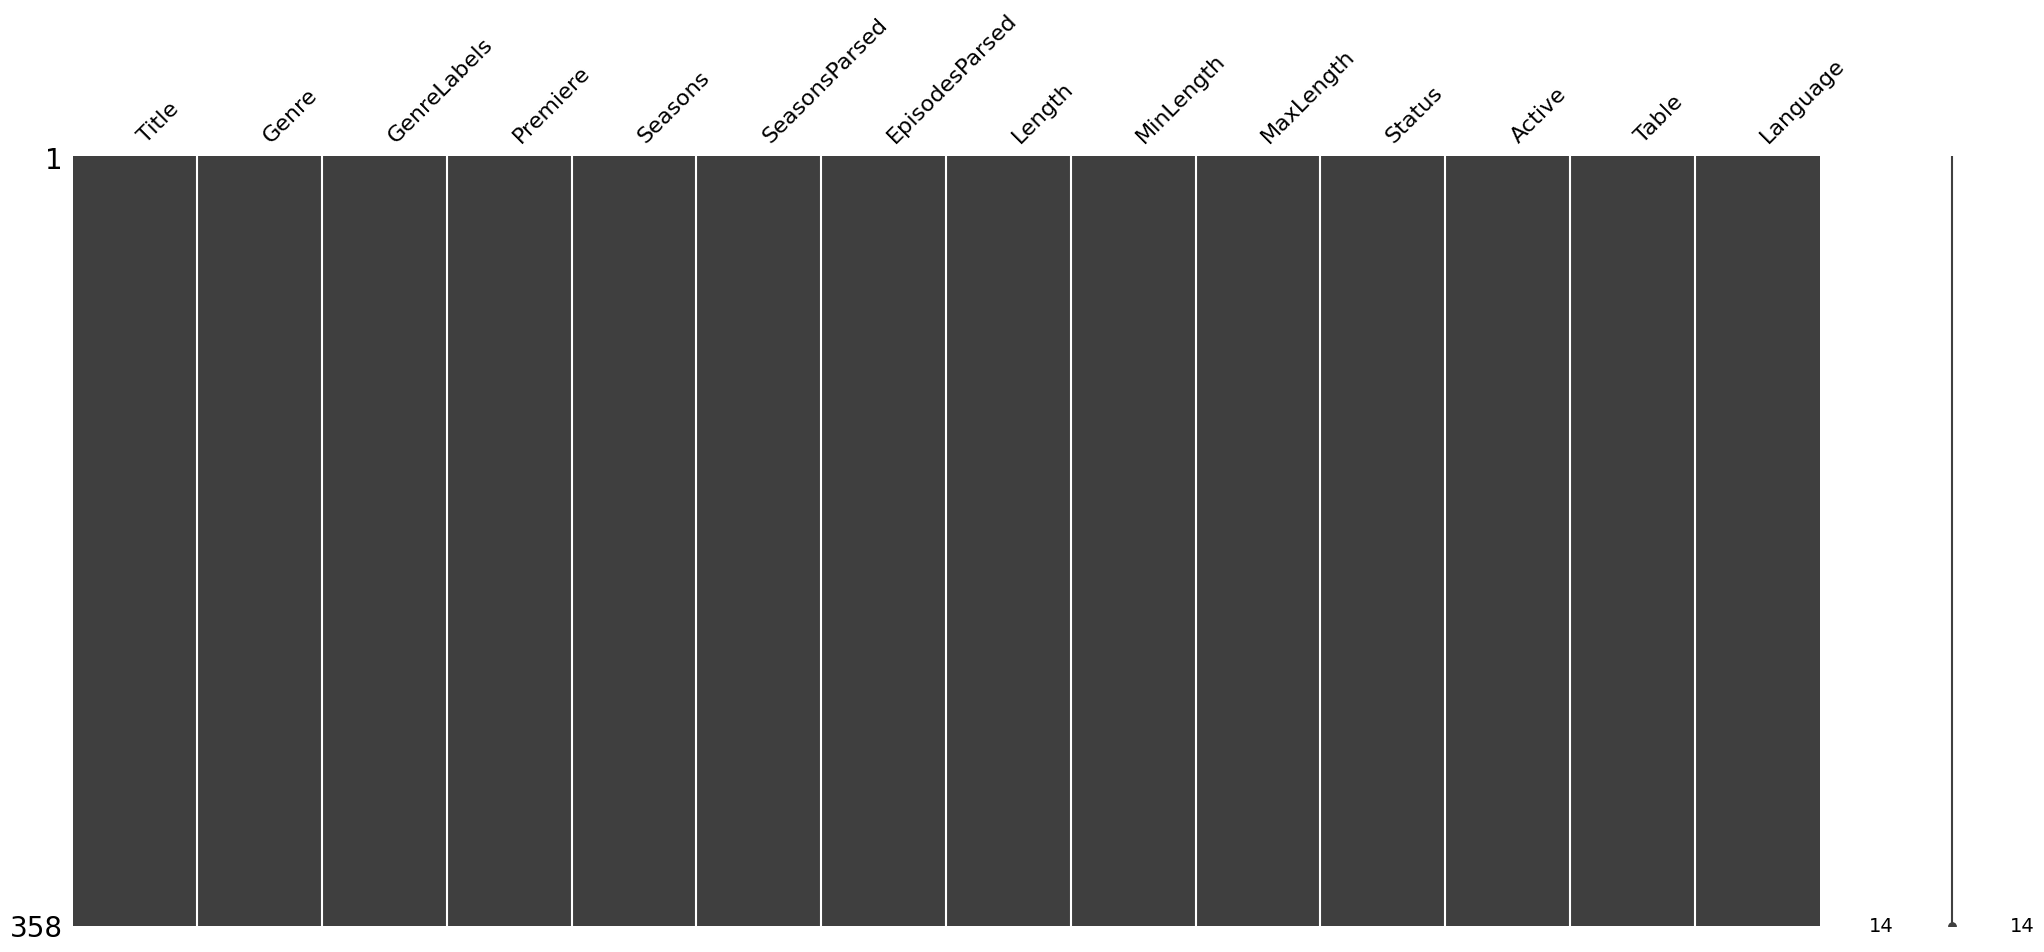

In [7]:
msno.matrix(df)

In [10]:

lenguajes = ['English', 'French', 'Spanish']

df_lenguajes = df['Language'].isin(lenguajes)

df_lenguajes = df[df_lenguajes]
df_lenguajes

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
0,House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
1,Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
2,Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
3,Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,A Little Help with Carol Burnett,Variety show,"variety,show",4-May-18,"1 season, 12 episodes",1,12,21–29 min.,21,29,Ended,0,VarietyTalk,English
354,The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English
355,Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English
356,Patriot Act with Hasan Minhaj,Talk show,"talk,show",28-Oct-18,"3 volumes, 19 episodes",0,19,23–30 min.,23,30,Renewed,1,VarietyTalk,English


In [11]:
excluidos = ['English', 'French', 'Spanish']

df_diferentes_lenguajes = ~df['Language'].isin(excluidos)

df_diferentes_lenguajes = df[df_diferentes_lenguajes]
df_diferentes_lenguajes

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
195,0.03,Science fiction,science-fiction,25-Nov-16,"3 seasons, 26 episodes",3,26,38–51 min.,38,51,Pending,1,ForeignLanguage,Portuguese
198,My Only Love Song,Comedy,comedy,9-Jun-17,"1 season, 20 episodes",1,20,27–30 min.,27,30,Ended,0,ForeignLanguage,Korean
199,Suburra: Blood on Rome,Crime drama,"crime,drama",6-Oct-17,"2 seasons, 18 episodes",2,18,42–62 min.,42,62,Renewed,1,ForeignLanguage,Italian
200,Blazing Transfer Students,Action comedy,"action,comedy",10-Nov-17,"1 season, 8 episodes",1,8,23–28 min.,23,28,Ended,0,ForeignLanguage,Japanese
201,Dark,Science fiction,science-fiction,1-Dec-17,"2 seasons, 18 episodes",2,18,45–61 min.,45,61,Renewed,1,ForeignLanguage,German
203,The Mechanism,Crime drama,"crime,drama",23-Mar-18,"2 seasons, 16 episodes",2,16,39–55 min.,39,55,Pending,1,ForeignLanguage,Portuguese
204,The Rain,Post-apocalyptic drama,"post-apocalyptic,drama",4-May-18,"2 seasons, 14 episodes",2,14,36–49 min.,36,49,Renewed,1,ForeignLanguage,Danish
206,Sacred Games,Drama,drama,6-Jul-18,"1 season, 8 episodes",1,8,43–55 min.,43,55,Renewed,1,ForeignLanguage,Hindi
207,Samantha!,Comedy,comedy,6-Jul-18,"2 seasons, 14 episodes",2,14,25–37 min.,25,37,Pending,1,ForeignLanguage,Portuguese
208,Jimmy: The True Story of a True Idiot,Comedy,comedy,20-Jul-18,"1 season, 9 episodes",1,9,39–64 min.,39,64,Pending,1,ForeignLanguage,Japanese


In [20]:
lenguajes = ['English', 'French', 'Spanish']
# Crea una máscara booleana para las series con idiomas permitidos
df_lenguajes = df['Language'].isin(lenguajes)
#series con status active
df_status  = df['Status'] == 'active'

#series con status renewed
#df_status  = df['Status'] == 'Renewed'

#series con status ended
#df_status  = df['Status'] == 'Ended'
df_status = df[df_lenguajes & df_status]
df_status


,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language


In [23]:
df_activas = df['Status'].isin(['active'])
df_status = ~df['Status'].isin(['Renewed', 'Ended'])
df_status = df[df_lenguajes & df_activas & df_status]
df_status

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language


In [24]:
generos = ['Mystery', 'Thriller']
df_mys_thriller = df[df['Genre'].isin(generos)]
df_mys_thriller

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
11,The OA,Mystery,mystery,16-Dec-16,"2 parts, 16 episodes",0,16,31–71 min.,31,71,Pending,1,Drama,English
30,Shadow,Thriller,thriller,8-Mar-19,"1 season, 8 episodes",1,8,40–49 min.,40,49,Pending,1,Drama,English


In [25]:
generos = ['Biography']
df_bio = df[df['Genre'].isin(generos)]
df_bio

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
254,Abstract: The Art of Design,Biography,biography,10-Feb-17,"1 season, 8 episodes",1,8,41–48 min.,41,48,Ended,0,DocuSeries,English
263,The Day I Met El Chapo,Biography,biography,20-Oct-17,"1 season, 3 episodes",1,3,48–61 min.,48,61,Ended,0,DocuSeries,English


In [26]:
generos = ['Comedy']
df_comedies = df[df['Genre'].isin(generos)]
df_comedies

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
45,Unbreakable Kimmy Schmidt,Comedy,comedy,6-Mar-15,"4 seasons, 51 episodes",4,51,23–53 min.,23,53,Ended,0,Comedy,English
48,Master of None,Comedy,comedy,6-Nov-15,"2 seasons, 20 episodes",2,20,21–57 min.,21,57,Ended,0,Comedy,English
52,Flaked,Comedy,comedy,11-Mar-16,"2 seasons, 14 episodes",2,14,30–34 min.,30,34,Ended,0,Comedy,English
55,Lady Dynamite,Comedy,comedy,20-May-16,"2 seasons, 20 episodes",2,20,26–36 min.,26,36,Ended,0,Comedy,English
57,Haters Back Off,Comedy,comedy,14-Oct-16,"2 seasons, 16 episodes",2,16,24–36 min.,24,36,Ended,0,Comedy,English
62,Girlboss,Comedy,comedy,21-Apr-17,"1 season, 13 episodes",1,13,24–29 min.,24,29,Ended,0,Comedy,English
64,GLOW,Comedy,comedy,23-Jun-17,"2 seasons, 20 episodes",2,20,27–46 min.,27,46,Renewed,1,Comedy,English
65,Friends from College,Comedy,comedy,14-Jul-17,"2 seasons, 16 episodes",2,16,26–34 min.,26,34,Ended,0,Comedy,English
68,Disjointed,Comedy,comedy,25-Aug-17,"2 parts, 20 episodes",0,20,23–32 min.,23,32,Ended,0,Comedy,English
74,All About the Washingtons,Comedy,comedy,10-Aug-18,"1 season, 10 episodes",1,10,22–27 min.,22,27,Ended,0,Comedy,English


In [30]:
df = pd.read_csv('NetflixOriginals.csv', header=0, sep=',')
df_mas_5 = df[df['SeasonsParsed'] > 5]
df_mas_5

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
0,House of Cards,Political drama,"political,drama",1-Feb-13,"6 seasons, 73 episodes",6,73,42–59 min.,42,59,Ended,0,Drama,English
2,Orange Is the New Black,Comedy-drama,comedy-drama,11-Jul-13,"6 seasons, 78 episodes",6,78,50–92 min.,50,92,Renewed,1,Drama,English
119,The Adventures of Puss in Boots,childrens-animation,childrens-animation,16-Jan-15,"6 seasons, 78 episodes",6,78,22–24 min.,22,24,Ended,0,Children,English
120,Dragons: Race to the Edge,childrens-animation,childrens-animation,26-Jun-15,"6 seasons, 78 episodes",6,78,22–23 min.,22,23,Ended,0,Children,English
129,Voltron: Legendary Defender,childrens-animation,childrens-animation,10-Jun-16,"8 seasons, 78 episodes",8,78,23–68 min.,23,68,Ended,0,Children,English
144,Spirit Riding Free,childrens-animation,childrens-animation,5-May-17,"8 seasons, 52 episodes",8,52,23 min.,23,23,Pending,1,Children,English
152,Trolls: The Beat Goes On!,childrens-animation,childrens-animation,19-Jan-18,"6 seasons, 38 episodes",6,38,24–25 min.,24,25,Pending,1,Children,English


In [31]:
df_menos_4 = df[df['SeasonsParsed'] < 4]
df_menos_4

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
1,Hemlock Grove,Horror/thriller,"horror,thriller",19-Apr-13,"3 seasons, 33 episodes",3,33,45–58 min.,45,58,Ended,0,Drama,English
3,Marco Polo,Historical drama,"historical,drama",12-Dec-14,"2 seasons, 20 episodes",2,20,48–65 min.,48,65,Ended,0,Drama,English
4,Bloodline,Thriller,thriller,20-Mar-15,"3 seasons, 33 episodes",3,33,48–68 min.,48,68,Ended,0,Drama,English
5,Sense8,Science fiction,science-fiction,5-Jun-15,"2 seasons, 24 episodes",2,24,45–152 min.,45,152,Ended,0,Drama,English
6,Narcos,Crime drama,"crime,drama",28-Aug-15,"3 seasons, 30 episodes",3,30,43–60 min.,43,60,Ended,0,Drama,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Busted!,Korean language variety show,"korean,language,variety,show",4-May-18,"1 season, 10 episodes",1,10,75–98 min.,75,98,Renewed,1,VarietyTalk,Korean
354,The Break with Michelle Wolf,Late-night,late-night,27-May-18,"1 season, 10 episodes",1,10,27 min.,27,27,Renewed,1,VarietyTalk,English
355,Norm Macdonald Has a Show,Talk show,"talk,show",14-Sep-18,"1 season, 10 episodes",1,10,26–35 min.,26,35,Pending,1,VarietyTalk,English
356,Patriot Act with Hasan Minhaj,Talk show,"talk,show",28-Oct-18,"3 volumes, 19 episodes",0,19,23–30 min.,23,30,Renewed,1,VarietyTalk,English


In [33]:
df_60_80 = df[(df['MinLength'] >= 60) & (df['MaxLength'] <= 80)]
df_60_80

,Title,Genre,GenreLabels,Premiere,Seasons,SeasonsParsed,EpisodesParsed,Length,MinLength,MaxLength,Status,Active,Table,Language
247,Chelsea Does,Comedy,comedy,23-Jan-16,"1 season, 4 episodes",1,4,62–74 min.,62,74,Ended,0,DocuSeries,English
278,Wild Wild Country,Documentary,documentary,16-Mar-18,6 episodes,0,6,64–72 min.,64,72,Miniseries,0,DocuSeries,English
